## Contexto

        Muito tem-se falado sobre sustentabilidade e práticas que colaboram com a preservação do meio ambiente e de seus recursos naturais. Nesse contexto, para reduzir os níveis de CO2 nas grandes e pequenas cidades ao redor do mundo, o uso da bicicleta como meio de transporte sustentável é cada vez mais incentivado. além de contribuir com o meio ambiente, andar de bicicleta é econômico e traz benefícios a saúde e o bem estar. O simples fato de pedalar até o trabalho já supre a falta de tempo (cada vez mais comum na atualidade) para a prática de exercícios, tonificando os músculos, auxiliando na perda de peso e melhorando a respiração e a circulação. 
        Sistemas de compartilhamento de bicicletas são a nova geração de aluguel de bicicletas tradicionais, em que todo o processo de inscrição, aluguel e devolução tornou-se automático. Por meio desses sistemas, o usuário pode facilmente alugar uma bicicleta em uma determinada estação e devolver em outra. Ao contrário de outros serviços de transporte, como ônibus ou metrô, a duração da viagem, posição de partida e chegada é explicitamente registrada nesses sistemas. Este recurso transforma o sistema de compartilhamento de bicicletas em uma rede de sensores virtual que pode ser usada para detectar a mobilidade na cidade.
        As informações utilizadas neste trabalho são da empresa Capital Bikeshare que consiste em um sistema de compartilhamento de bicicletas do metrô de Washington, com mais de 4.300 bicicletas disponíveis em 500 estações em três estados norte-americanos diferentes (Virginia, VA; Washington, DC e Maryland, MD). A Capital Bikeshare oferece aos residentes e visitantes uma opção de transporte conveniente, divertida e acessível. As pessoas usam a bicicleta compartilhada para ir ao trabalho ou à escola, fazer recados, ir a compromissos ou encontros sociais e muito mais. Capital Bikeshare está disponível para uso 24 horas por dia, 7 dias por semana, 365 dias por ano. Os pilotos têm acesso a uma bicicleta em qualquer estação do sistema.

## Problema
        Nesse contexto gostaríamos de analisar quais fatores influenciam na tomada de decisão para o aluguel de bicicletas compartilhadas pela Capital Bikeshare, pois tal análise se justifica à medida que conhecer os padrões e perfis dos usuários desse sistema  de transporte pode auxiliar na decisão de alocação de recursos da empresa, por exemplo, saber o período e a estação do ano com maior quantidade de usuários ajudará a empresa a alocar uma maior quantidade de veículos pedaláveis em circulação, assim como períodos com menos uso podem ser alocados para a manutenção dos equipamentos.

## Base de Dados

        Base de dados utilizada nesse estudo chama-se: Bike Sharing Dataset e está disponível para livre acesso em https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset?select=day.csv. Esta base traz informações para os anos de 2011 e 2012 e as variáveis obtidas são sumarizadas abaixo:
        •	instant: índice de registro;
        •	dteday: data do registro;
        •	season: estação do ano (1: primavera, 2: verão, 3: outono, 4: inverno);
        •	ano: ano (0: 2011, 1: 2012);
        •	mnth: mês (1 a 12);
        •	hr: hora (0 a 23);
        •	holiday: o dia da semana é feriado ou não (extraído de [Web Link])
        •	weekday: dia da semana;
        •	workingday: se o dia não for fim de semana nem feriado for 1, caso contrário, será 0;
        •	weathersit: condição climática (1: céu limpo, poucas nuvens, parcialmente nublado, parcialmente nublado; 2: Névoa + Nublado, Névoa + Nuvens quebradas, Névoa + Algumas nuvens, Névoa; 3: neve fraca, chuva fraca + trovoada + nuvens dispersas, chuva fraca + nuvens dispersas ;4: Chuva forte + Paletes de gelo + Trovoada + Névoa, Neve + Nevoeiro);
        •	temp: Temperatura normalizada em Celsius. Os valores são derivados via (tt min) / (t max-t min), t min = -8, t_max = + 39 (apenas na escala horária);
        •	atemp: Sensação de temperatura normalizada em Celsius. Os valores são derivados através de (tt min) / (t max-t min), t min = -16, t_max = + 50 (apenas na escala horária);
        •	hum: Umidade normalizada. Os valores são divididos em 100 (máx.);
        •	velocidade do vento: velocidade do vento normalizada. Os valores são divididos em 67 (máx);
        •	casual: contagem de usuários casuais;
        •	registrados: contagem de usuários registrados;
        •	cnt: contagem do aluguel total de bicicletas, incluindo casuais e registradas.



## Tratamento de valores nulos
        Esses dados foram processados para remover viagens feitas pela equipe durante a manutenção e inspeção do sistema, viagens feitas de/para qualquer uma de nossas estações de "teste" em nossos armazéns e quaisquer viagens com duração inferior a 60 segundos (partidas potencialmente falsas ou usuários tentando encaixar novamente uma bicicleta para garantir que esteja segura) tais tratamentos foram feitos pela própria Bike Sharing, além disso não foram encontrados valores nulos na base de dados em análise.


## Expectativa dos resultados
        Espera-se que estações do ano com períodos de climas mais amenos intensifiquem o uso de bicicleta, que haja mais usuários casuais aos fins de semana e feriados e verificar em que dias da semana tem maior quantidade de usuários.

In [1]:
#Importando bibliotecas
library(plyr)
library(ggplot2)
install.packages("corrplot")
library(corrplot)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



In [2]:
#Obtendo base de dados
base <- read.csv("day.csv", header=T, sep=',')
base["cnt"] <- as.integer(gsub(";", "", base$cnt..........))
base$cnt.......... <- NULL

#checando se possui dados nulos
is.null(base)

base <- data.frame(base) 

[1] FALSE

#### (!!) Observação (!!)
       A base possui um campo que muito provavelmente foi lido com "sujeira" da planilha base, sendo este o "cnt..........". Por conta disso, não estava sendo viavél utilizar ele para realizar as análises. Criamos um novo campo, de mesmo nome, retirando apenas os pontos e esse campo recebeu ele mesmo, retirando os caracteres especiais e transformado em um tipo inteiro. O original foi "droppado" da base.

In [3]:
head(base)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [4]:
summary(base)

    instant             dteday        season            yr        
 Min.   :  1.0   2011-01-01:  1   Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   2011-01-02:  1   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   2011-01-03:  1   Median :3.000   Median :1.0000  
 Mean   :366.0   2011-01-04:  1   Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5   2011-01-05:  1   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0   2011-01-06:  1   Max.   :4.000   Max.   :1.0000  
                 (Other)   :725                                   
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.0

In [5]:
#Transformando alguns dados

dados_aux <- base

dados_aux$season <- factor(format(dados_aux$season, format="%A"),
                          levels = c("1", "2","3","4") , labels = c("Primavera","Verão","Outono","Inverno"))

dados_aux$holiday <- factor(format(dados_aux$holiday, format="%A"),
                            levels = c("0", "1") , labels = c("Dia de trabalho","Feriado"))

dados_aux$weathersit <- factor(format(dados_aux$weathersit, format="%A"),
                              levels = c("1", "2","3","4") , 
                              labels = c("Bom: Limpo/Ensolarado","Moderado: Nublado/Névoa","Ruim: Chuva/Neve/Névoa","Pior: Chuva/Neve/Névoa fortes"))

dados_aux$weekday <- factor(format(dados_aux$weekday, format="%A"),
                               levels = c("0", "1", "2","3","4", "5", "6") , 
                               labels = c("Domingo","Segunda","Terça","Quarta", "Quinta","Sexta","Sábado"))
dados_aux$workingday <- factor(format(dados_aux$workingday, format="%A"),
                            levels = c("1", "0") , labels = c("Dia de trabalho","Finalde Semana/Feriado"))

### Sobre o tratamento de alguns dados acima:
     Foi utilizada uma base auxiliar, copia da original, para que fosse possível alterar algumas informações que facilitariam na exibição dos gráficos. Tais alterações foram: 
      • Season/estação: na base original, eram atribuídos valores de 1 a 4 (primavera, verão, outono e inverno, respectivamente) e foram alterados para os nomes das estações propriamente ditos para que fosse mais intuíto gerar/visualizar as análises;
      • Holiday/Feriado: na base original, eram atribuídos valores 0 e 1 que significavam dia de trabalho e feriado, respectivamente. Foi alterado para os valores propriamente ditos;
      • Weathersit/Clima: na base original, eram atribuídos valores de 1 a 4. Foram alteramos para os valores abaixo:
          1 = Bom: Limpo/Ensolarado"
          2 = "Moderado: Nublado/Névoa"
          3 = "Ruim: Chuva/Neve/Névoa"
          4 = "Pior: Chuva/Neve/Névoa fortes"
      • Weekday/Dia da Semana: na base original, eram atribuídos valores de 0 a 6, zero sendo domingo. Foram alterados para os dias da semana correspondentes ao número. 
      • Workingday/Dias de Trabalho: na base original, eram atribuídos valores 0 e 1 que significavam dia de trabalho e feriado, respectivamente. Foi alterado para os valores propriamente ditos;
      

## 1. Análises Estatísticas

In [6]:
#Base auxiliar depois de ter sofrido o tratamento de alguns dados afim de facilitar análise.
head(dados_aux)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,Primavera,0,1,Dia de trabalho,Sábado,Finalde Semana/Feriado,Moderado: Nublado/Névoa,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,Primavera,0,1,Dia de trabalho,Domingo,Finalde Semana/Feriado,Moderado: Nublado/Névoa,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,Primavera,0,1,Dia de trabalho,Segunda,Dia de trabalho,Bom: Limpo/Ensolarado,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,Primavera,0,1,Dia de trabalho,Terça,Dia de trabalho,Bom: Limpo/Ensolarado,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,Primavera,0,1,Dia de trabalho,Quarta,Dia de trabalho,Bom: Limpo/Ensolarado,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,Primavera,0,1,Dia de trabalho,Quinta,Dia de trabalho,Bom: Limpo/Ensolarado,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [7]:
colunas <- c("instant","dteday", "cnt.........." )

In [8]:
base2<-base[ , -which(names(base) %in% colunas), drop = F]

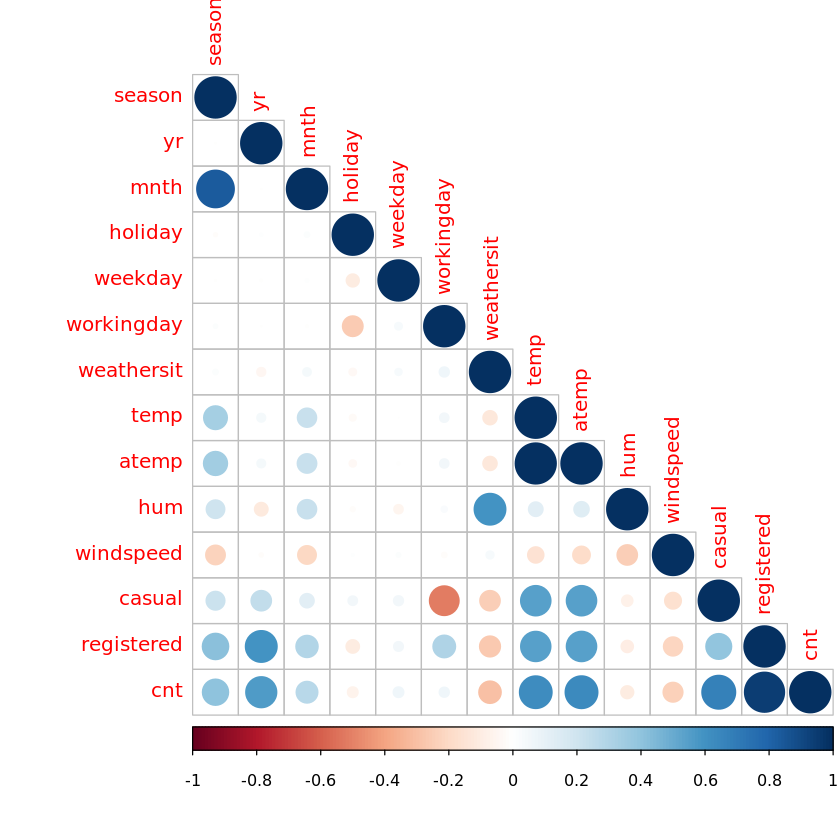

In [9]:
##Analisando a correlação entre os dados
cor_pearson <-cor(base2)
corrplot(cor_pearson,type="lower")

### Interpretação:
    Com base no gráfico de correlação conseguimos verificar que: 
     • Existe uma correlação positiva e significante entre o quantidade de locações (cnt) e a Temperatura (temp);
     • Existe uma correlação negativa entre a quantidade de locações (cnt) e as Condicões do clima (weathersit);
     • Existe uma correlação negativa entre usuários casuais (casual) e dias de trabalho (workingday);
     • Existe uma correlação positiva entre usuários registrado (registred) e dias de trabalho (workingday);
     • Existe uma correlação negativa entre a velocidade do vento (windspeed) e a quantidade de locações (cnt);
     • Existe uma correlação positiva entre as estações (season) e a quantidade de locações (cnt).

    Nos gráficos abaixos conseguiremos visualizar melhor o comportamento dos dados.

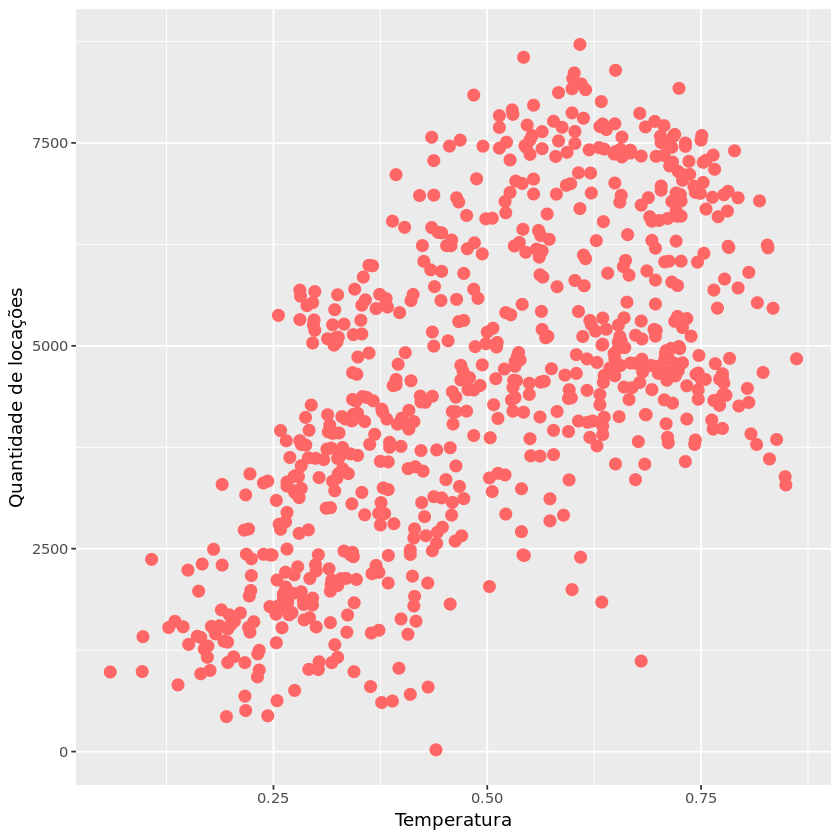

In [10]:
## Análise da influência da temperatura na quantidade de locações
    ggplot(dados_aux, aes(x= temp, y=cnt)) +
     geom_point(color='#ff6666', aes(x = temp,
                    y = cnt),
                 size = 3) + 
    xlab("Temperatura") + 
    ylab("Quantidade de locações") 

### Interpretação:
    Conforme já indicado no gráfico de correlação, é possível visualizar um aumento na quantidade de locações conforme temos um aumento na temperatura. 

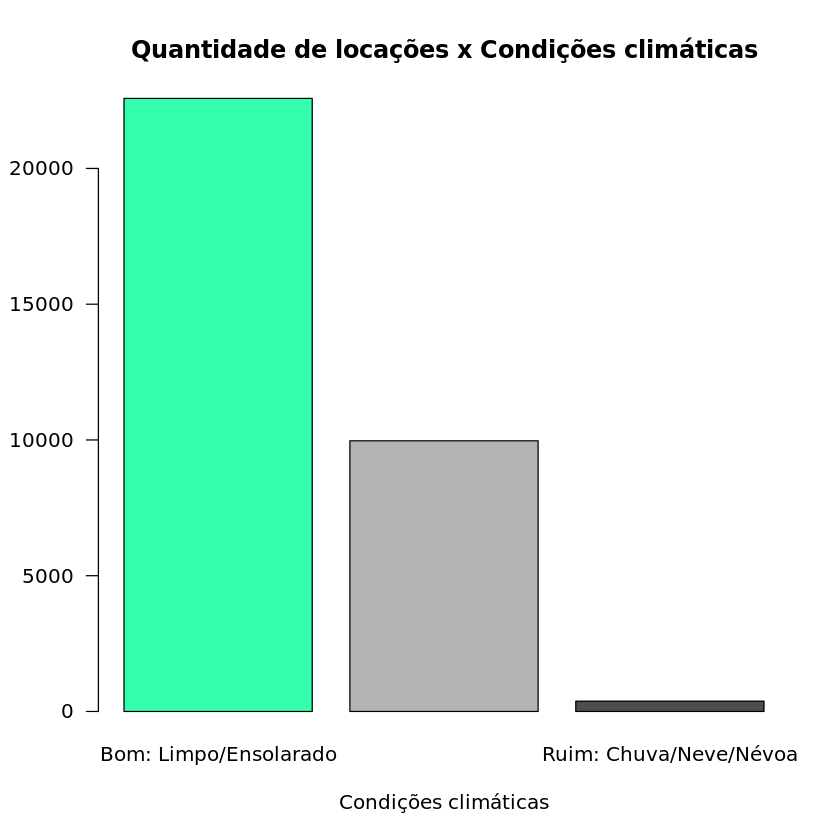

In [11]:
#Locações de bicicleta por condições climáticas

locacoesCondicoesClimaticas <- ddply(dados_aux,
                                     c("weathersit"),
                                     summarize,
                                     total = sum(cnt))



barplot(height = locacoesCondicoesClimaticas$total/100, 
        names = locacoesCondicoesClimaticas$weathersit, 
        xlab = "Condições climáticas",
        main = "Quantidade de locações x Condições climáticas",
        ##ylab = "Qtd. de locações",
        col=c("#33ffad", "#b3b3b3", "#4d4d4d"), 
        horiz=F,
        las=1)

### Interpretação:
    Assim como no gráfico anterior, as condições climáticas também representam um fator relevante. Dias com clima ensolarado tem uma quantidade total de locações 119% maior que dias nublados.  

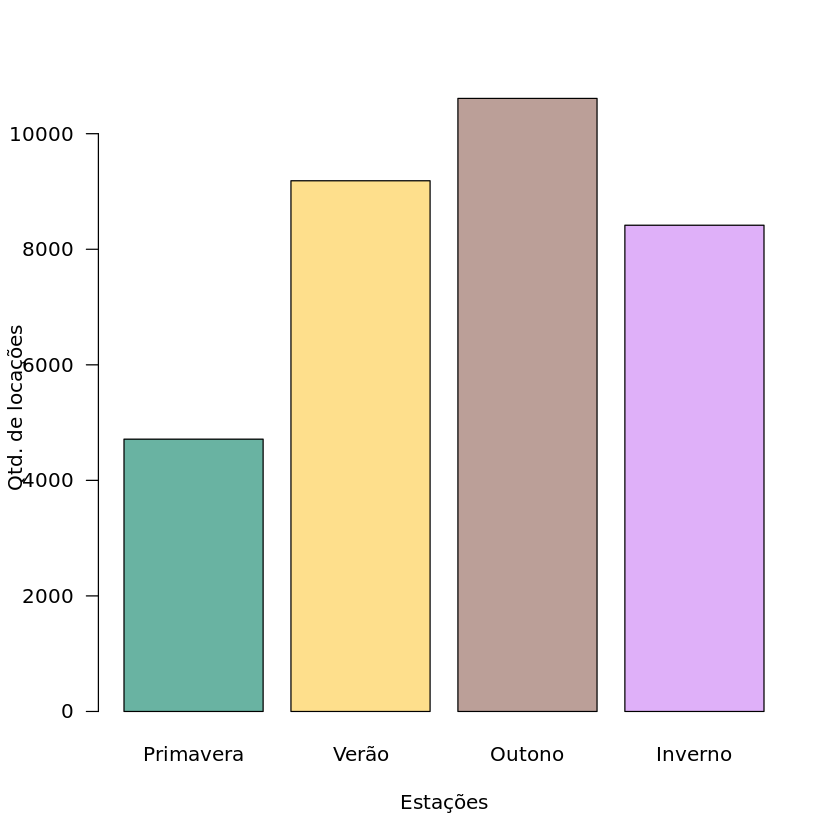

In [12]:
#Locações de bicicletas por estações

locacoesPorEstacao <- ddply(dados_aux,
                            c("season"),
                            summarise,
                            total = sum(cnt))

barplot(height = locacoesPorEstacao$total/100, 
        names = locacoesPorEstacao$season, 
        xlab = "Estações",
        ylab = "Qtd. de locações",
        col=c("#69b3a2", "#FEDF8C", "#BB9F98", "#DFB0F9"), 
        horiz=F, 
        las=1)

### Interpretação:
    Outono e verão são estações onde ocorre a maior quantidade de locações durante o ano. Do verão para o outono tivemos um aumento de 15,51%, enquanto do outono para o inverno as locações cairam em 20,68%.

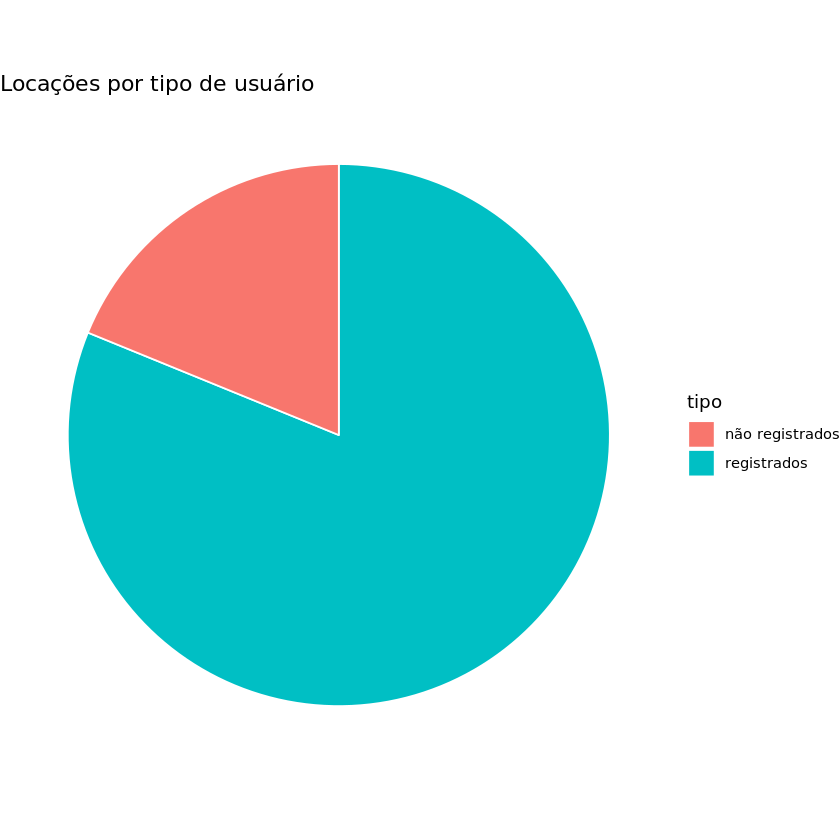

In [13]:
#Tipos de locação

tiposLocacao <- data.frame(quantidade = 
                              c(sum(base$casual), sum(base$registered)), 
                           tipo = 
                             c("não registrados","registrados"))

ggplot(
  tiposLocacao, 
  aes(x="", y=quantidade, fill=tipo)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  labs(title="Locações por tipo de usuário") +
  theme_void()

### Interpretação:
    • Maioria significativa dos usuários das bicicletas são usuários registrados, representando 81,2% do total de locações.
    • Não é possível analisar os dados levando em consideração a quantidade de usuários registrados ou não, apenas a quantidade de locações que ocorreram pois, na base, não é especificado a quantidade exata de usuários que possuem ou não cadastros, só a de uso por cada tipo. 


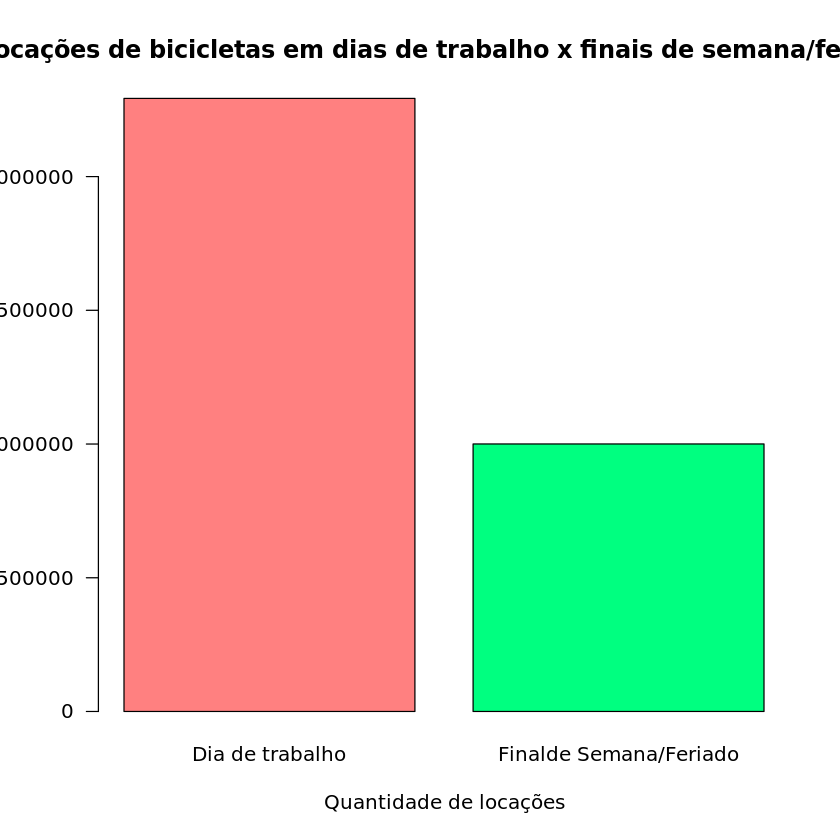

In [14]:
#Locações de bicicletas em dias de trabalho x finais de semana/feriado

locacoes_workingdays <- ddply(dados_aux,
                         c("workingday"),
                         summarise,
                         total = sum(casual, registered))


barplot(height=locacoes_workingdays$total, 
        names=locacoes_workingdays$workingday, 
        xlab = "Quantidade de locações",
        main = "Locações de bicicletas em dias de trabalho x finais de semana/feriado",
        col= c("#ff8080", "#00ff80"), 
        horiz=F,
        las=1)

### Interpretação:
    Como podemos verificar no gráfico um grande número das locações são feitos em dias de semana (69%) indicando uma possibilidade dos locadores utilizarem esse meio de transporte para trabalho ou estudo

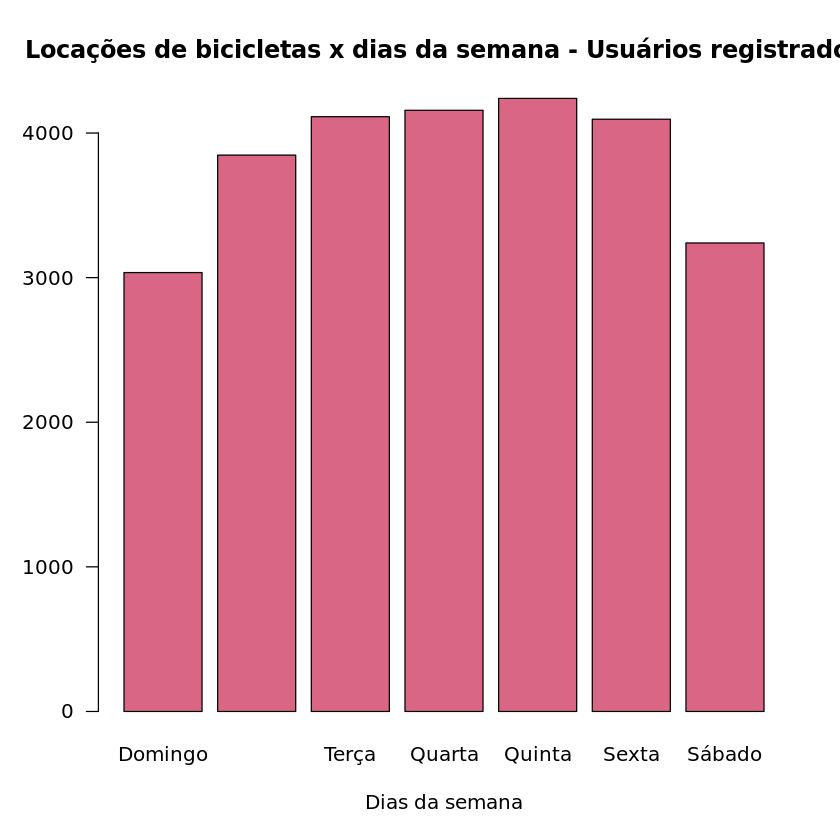

In [15]:
#Locações de bicicletas por dias da semana - Usuários registrados
locacoesSemana <- ddply(dados_aux,
           c("weekday"),
           summarise,
           total = sum(registered))


barplot(height=locacoesSemana$total/100,
        names=locacoesSemana$weekday, 
        xlab = "Dias da semana",
        main = "Locações de bicicletas x dias da semana - Usuários registrados",
        col="#DA6686", 
        horiz=F,
        las=1)

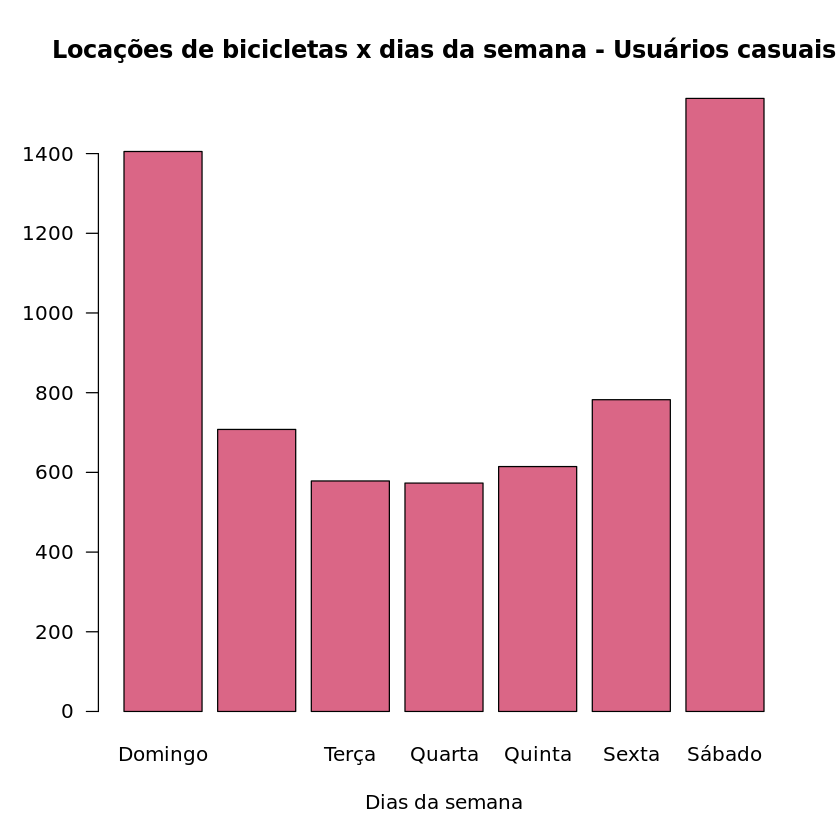

In [16]:
#Locações de bicicletas por dias da semana - Usuários Casuais
locacoesSemana <- ddply(dados_aux,
           c("weekday"),
           summarise,
           total = sum(casual))


barplot(height=locacoesSemana$total/100,,
        names=locacoesSemana$weekday, 
        xlab = "Dias da semana",
        main = "Locações de bicicletas x dias da semana - Usuários casuais",
        col="#DA6686", 
        horiz=F,
        las=1)

### Interpretação:
    Com base no comportamentos dos dois gráficos, conseguimos perceber que os usuários registrados utilizam uma média 30% maior nos dias de semana em comparação aos fim de semana, enquanto usuários casuais utilizam uma média 125% maior nos fim de semana do que na semana. 

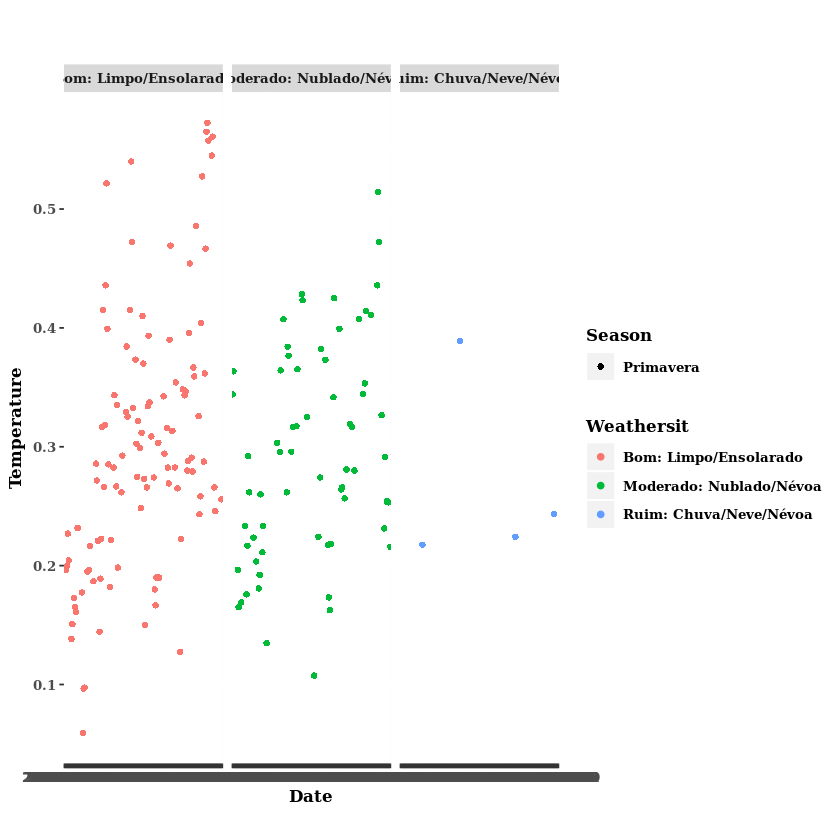

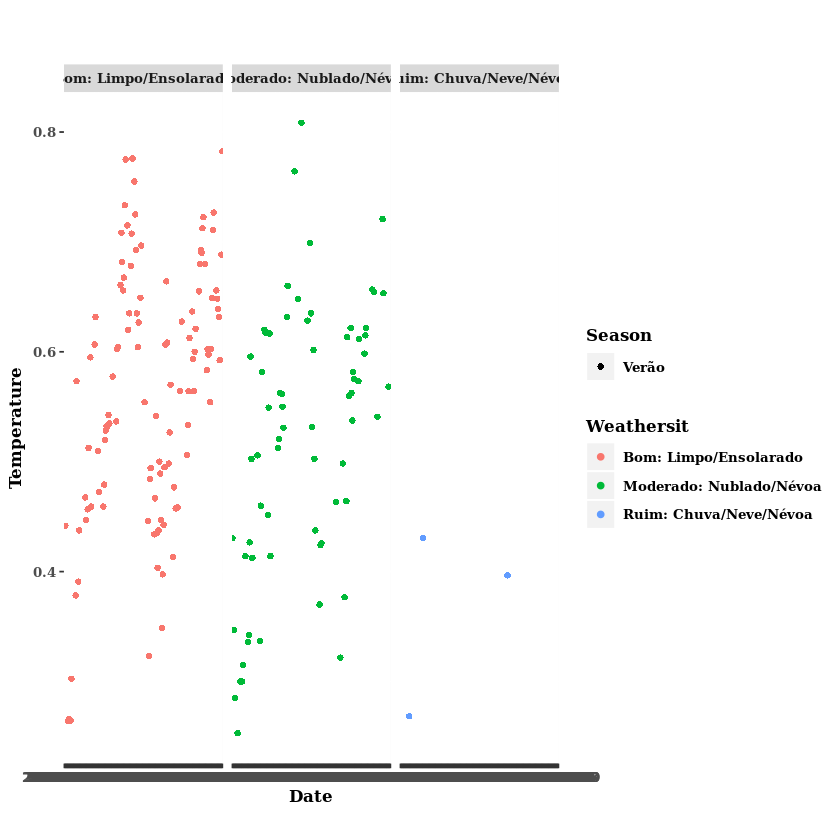

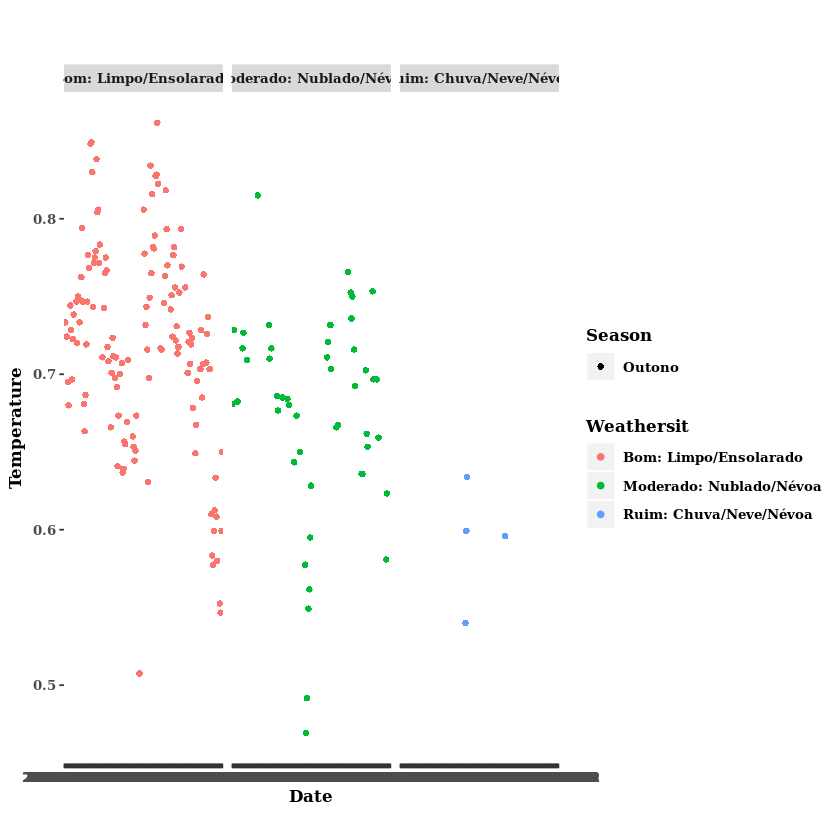

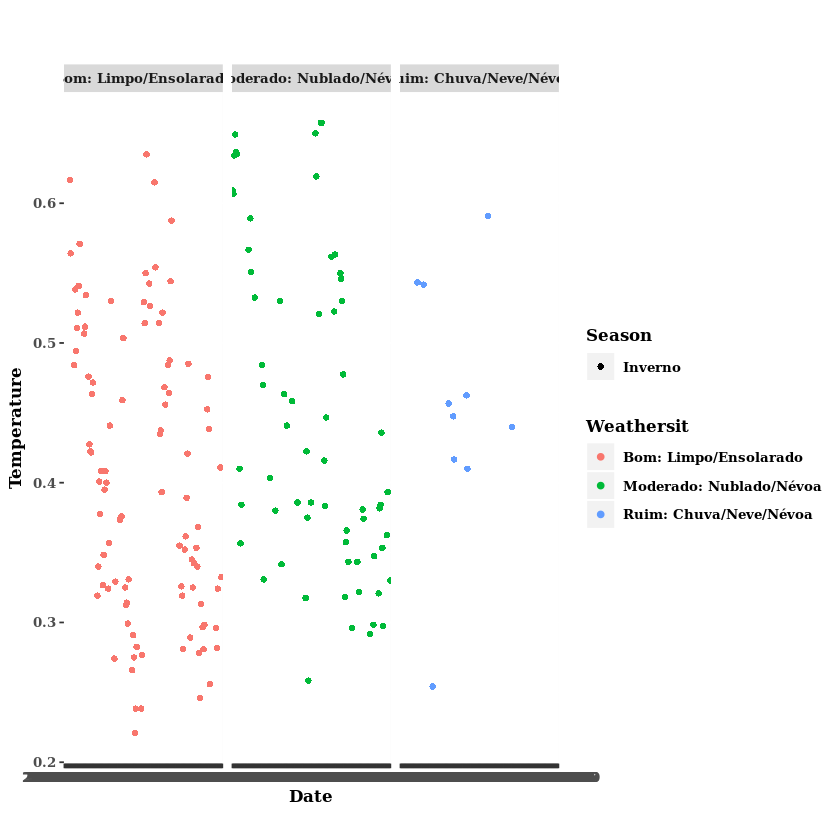

In [17]:
dados_primavera <- dados_aux[ dados_aux$season == "Primavera", ]
  ggplot(dados_primavera, aes(x=dteday, y=temp, colour = factor(weathersit), shape = factor(season)))+
  geom_point() + 
  theme(legend.position = 'right', legend.direction = "vertical",
        text = element_text(family="Times New Roman", color="black", size=10, face="bold"))+
  labs(title = '', subtitle = '', caption = '',
         x = 'Date', y = 'Temperature', colour = 'Weathersit', shape = 'Season')+
  facet_wrap(~factor(weathersit))

dados_verao <- dados_aux[ dados_aux$season == "Verão", ]
  ggplot(dados_verao, aes(x=dteday, y=temp, colour = factor(weathersit), shape = factor(season)))+
  geom_point() + 
  theme(legend.position = 'right', legend.direction = "vertical",
        text = element_text(family="Times New Roman", color="black", size=10, face="bold"))+
  labs(title = '', subtitle = '', caption = '',
         x = 'Date', y = 'Temperature', colour = 'Weathersit', shape = 'Season')+
  facet_wrap(~factor(weathersit))

dados_outono <- dados_aux[ dados_aux$season == "Outono", ]
  ggplot(dados_outono, aes(x=dteday, y=temp, colour = factor(weathersit), shape = factor(season)))+
  geom_point() + 
  theme(legend.position = 'right', legend.direction = "vertical",
        text = element_text(family="Times New Roman", color="black", size=10, face="bold"))+
  labs(title = '', subtitle = '', caption = '',
         x = 'Date', y = 'Temperature', colour = 'Weathersit', shape = 'Season')+
  facet_wrap(~factor(weathersit))

dados_inverno <- dados_aux[ dados_aux$season == "Inverno", ]
  ggplot(dados_inverno, aes(x=dteday, y=temp, colour = factor(weathersit), shape = factor(season)))+
  geom_point() + 
  theme(legend.position = 'right', legend.direction = "vertical",
        text = element_text(family="Times New Roman", color="black", size=10, face="bold"))+
  labs(title = '', subtitle = '', caption = '',
         x = 'Date', y = 'Temperature', colour = 'Weathersit', shape = 'Season')+
  facet_wrap(~factor(weathersit))

### Interpretação:
         Observa-se nesses gráficos que há uma maior quantidade de locação em dias com clima “bom”, independente da estação. Além disso há uma redução significativa de alugueis de bicicleta conforme as condições climáticas vão piorando. Observa-se também que há mais alugueis  em condições “ruim” na estação inverno (quando comparado as demais estações ), muito provavelmente por haverem mais dias com tais condições climáticas nessa estação. Em contrapartida, houve pouca adesão das bicicletas em dia com clima “ruim” durante o verão. Por motivos análogos, na primavera parece haver uma quantidade maior de alugueis onde as condições climáticas eram “moderadas”.

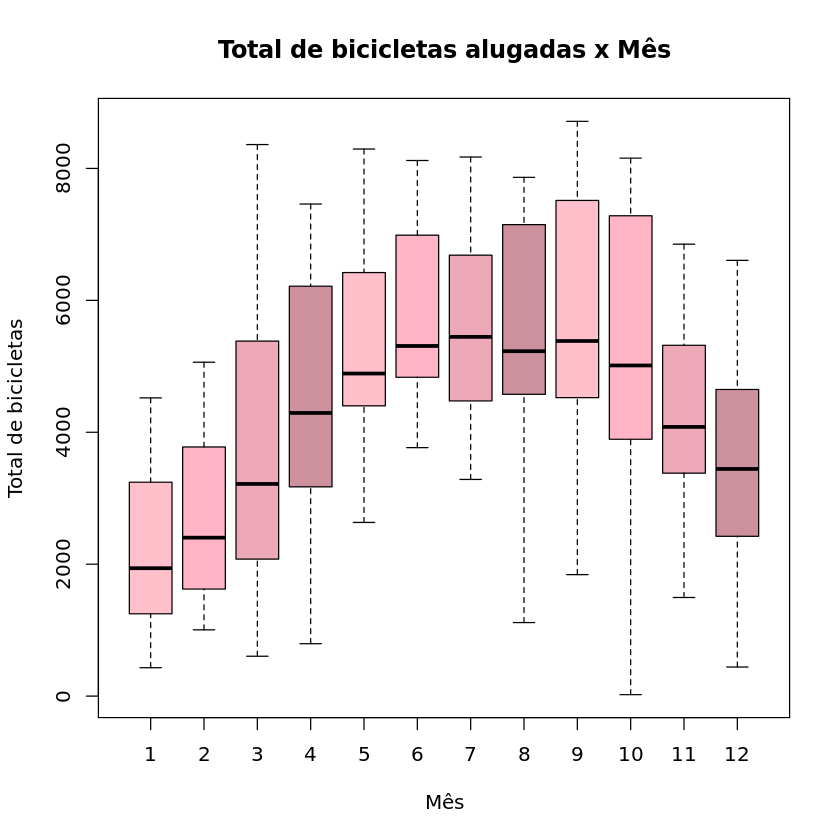

In [18]:
#Total de bicicletas locadas ao mês 
boxplot(dados_aux$cnt ~ dados_aux$mnth,
        data = dados_aux,
        main = "Total de bicicletas alugadas x Mês",
        xlab = "Mês",
        ylab = "Total de bicicletas",
        col = c("pink", "pink1", "pink2", "pink3"))

In [19]:
#Bibliotecas
library(corrplot)
install.packages("factoextra")
install.packages("fviz_nbclust")
library(factoextra)
install.packages("NbClust")
library(NbClust)
install.packages("gridExtra")
library("gridExtra")
install.packages("randomForest")
require("randomForest")
install.packages("randomForestExplainer")
require("randomForestExplainer")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zip’, ‘modeltools’, ‘DEoptimR’, ‘SparseM’, ‘MatrixModels’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘mvtnorm’, ‘robustbase’, ‘kernlab’, ‘trimcluster’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘fpc’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Warning message:
“package ‘fviz_nbclust’ is not available (for R version 3.6.3)”
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Loading required package: rando

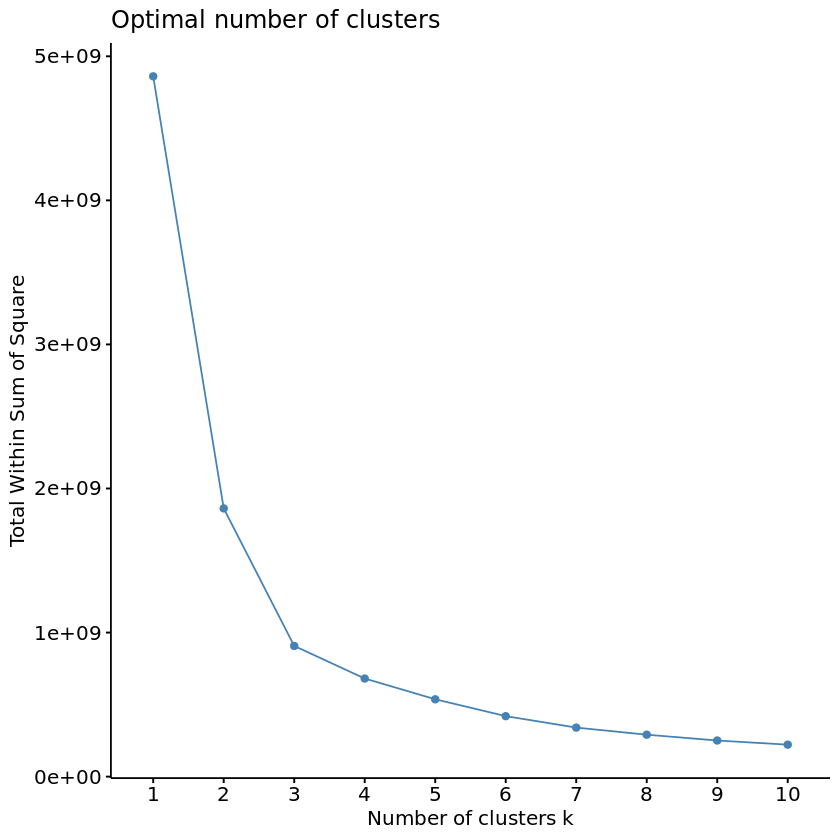

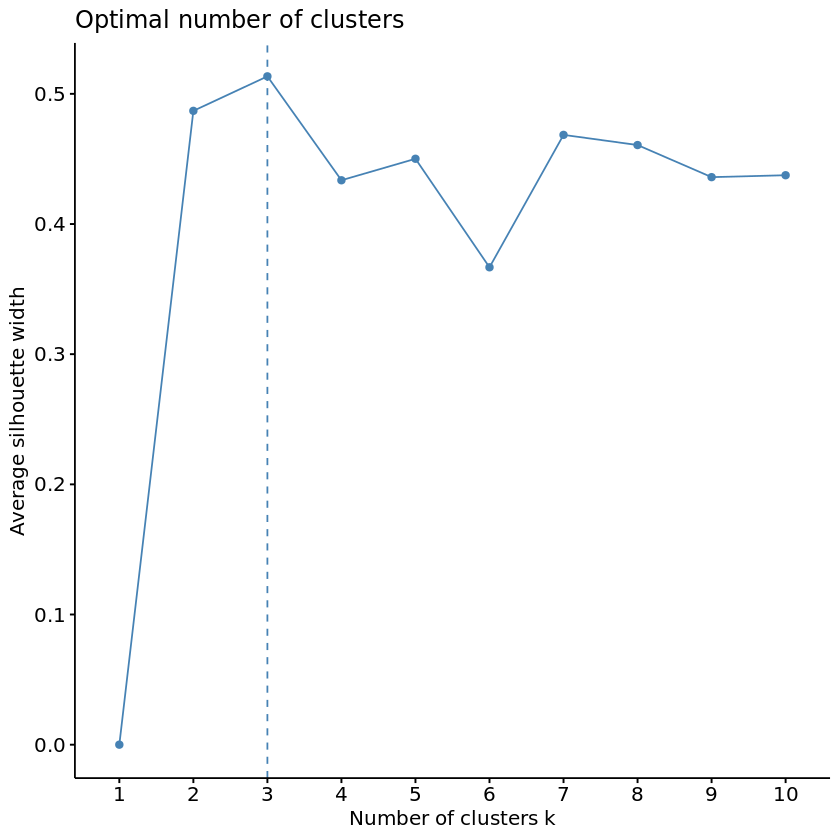

In [20]:
#Encontrando o número ótimo de cluster 
#Para encontrar o número ótimo utilizou-se dois métodos, Elbow e Silhouette
fviz_nbclust(base2, kmeans, method = "wss")

fviz_nbclust(base2, kmeans, method = "silhouette")


#Observa-se que ambos deduzem que o melhor número de grupos é 3.

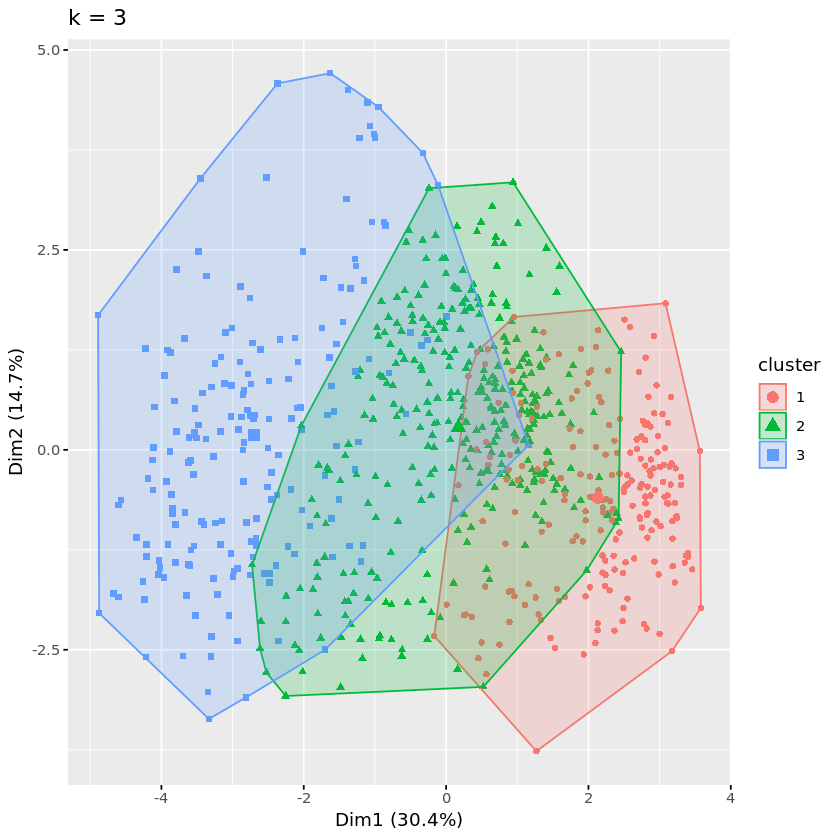

In [23]:
#Observa-se que ambos deduzem que o melhor número de grupos é 3.
#Aplicando o Kmeans
km = kmeans(base2, 3, nstart=25)
p <- fviz_cluster(km, geom = "point",  data = base2) + ggtitle("k = 3")
grid.arrange(p, nrow = 1)

base2["cluster"]<-c(km$cluster)

### Breve descrição sobre os grupos: 
    Grupo 1 – com 6859 aluguéis, predominando os dias de trabalho e de semana. Estações predominantes foram verão, outono e inverno, em dias de clima claro ou pouco nublado;
    Grupo 2 – assemelhasse ao grupo 1, com 4442 aluguéis;
    Grupo 3 – Menor número de aluguéis, 1969. Estações predominantes foram primavera, verão e inverno, em dias de clima nevoeiro, neblina, nublado, neve fraca ou chuva fraca.

In [24]:
#Aplicando Random Forest - Esse algoritmo utiliza a técnica de Árvores de Decisão
#A árvore de decisão é uma das formas mais rápidas de identificar as variáveis 
#mais significativas e a relação entre duas ou mais variáveis. Com a ajuda de árvores de decisão,
#podemos criar novas variáveis/características que tenham melhores condições de predizer a variável alvo. 

#Tratar a base para limpar algumas váriáveis tendenciosas
#A variável ano foi retirada pois a variação foi muito pequena
#A variável cnt é a soma de casual e registered

colunas2 <- c("yr","casual", "registered", "atemp" )
base_random<-base2
base_random<-base_random[ , -which(names(base_random) %in% colunas2), drop = F]


In [25]:

#A aplicação do random forest vai ter como objetivo identificar quais variaveis são mais
# singnificativas no total de aluguel por dia
forest<-randomForest(cnt ~ ., data=base_random, localImp = TRUE)
 
#A precisão da previsão de nossa floresta pode ser resumida da seguinte forma (MSE e RMS)
forest



Call:
 randomForest(formula = cnt ~ ., data = base_random, localImp = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 321518.9
                    % Var explained: 91.42

Warning message:
“Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`”
Warning message:
“Factor `split var` contains implicit NA, consider using `forcats::fct_explicit_na`”


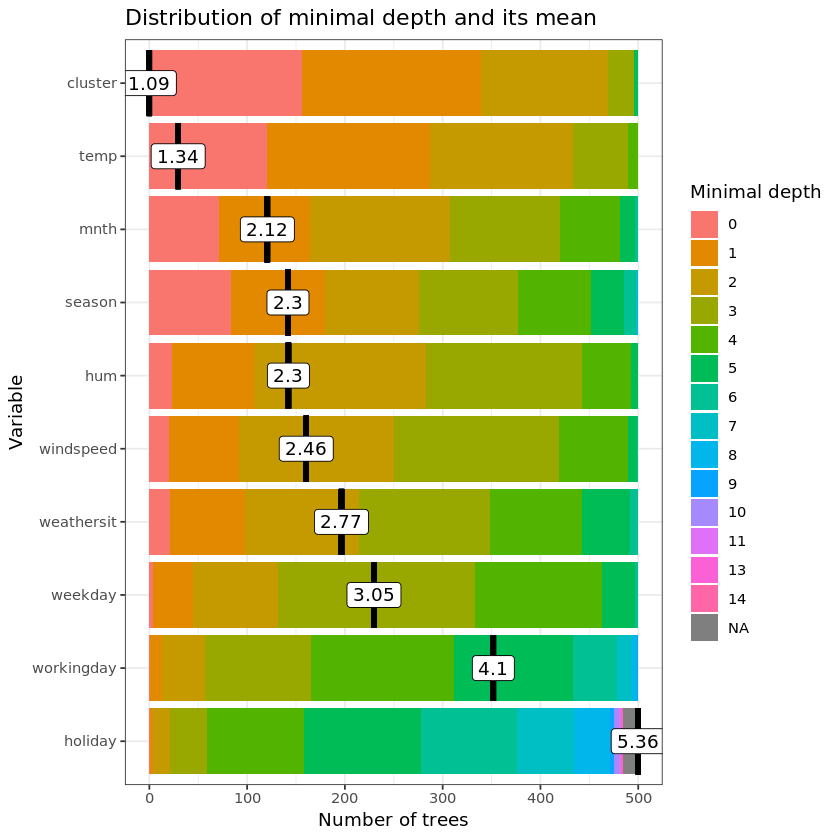

Warning message:
“Using alpha for a discrete variable is not advised.”


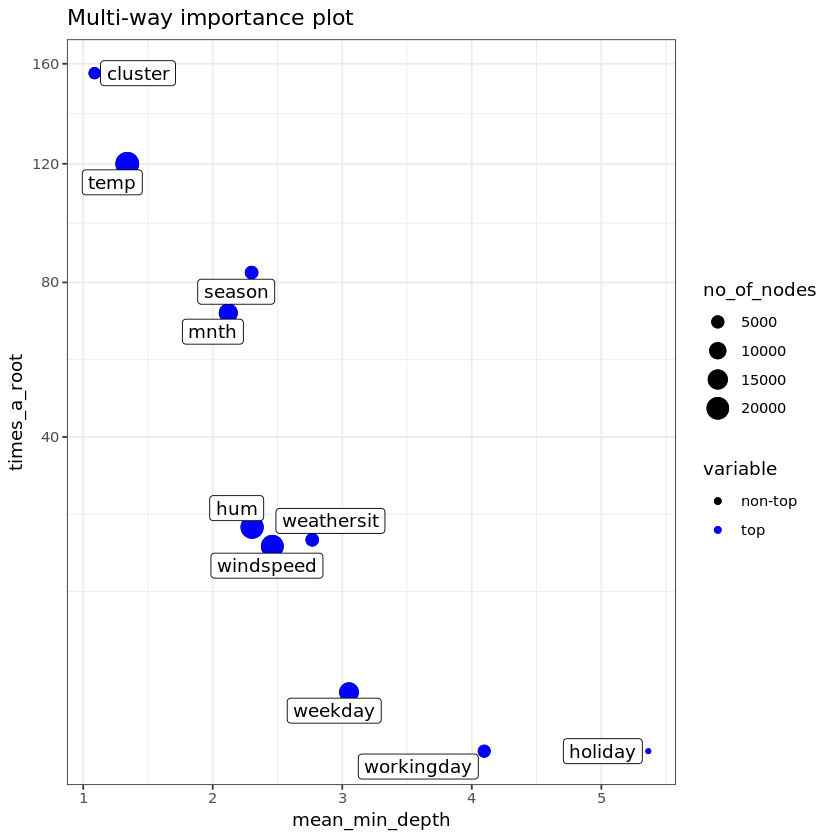

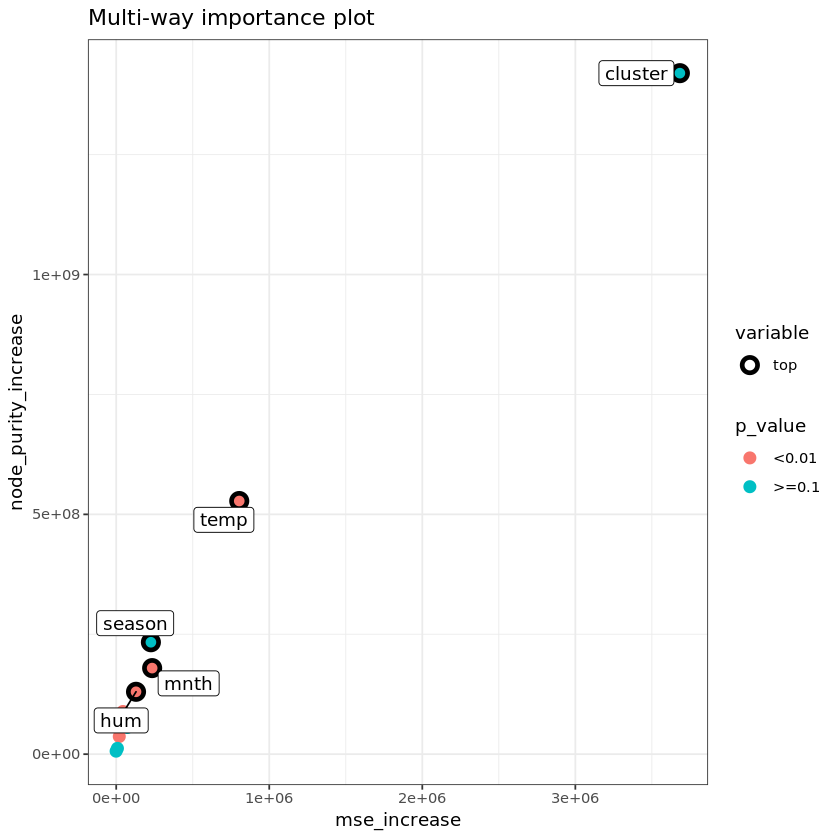

In [26]:

#Aplicando o método para obter a distribuição de profundidade mínima
#Essa função calcula a distribuição das médias e retorna a distribuição 
#das variaveis mais significativas em relação a variável cnt
min_depth_frame<-min_depth_distribution(forest)
plot_min_depth_distribution(min_depth_frame)

#Agora usa-se um comando para fazer uma mensuração do grau de importância
#measure_importance - Obtenha um quadro de dados com várias medidas de
#importância das variáveis em uma floresta aleatória
importance_frame<-measure_importance(forest)
plot_multi_way_importance(importance_frame, size_measure = "no_of_nodes")

plot_multi_way_importance(importance_frame, x_measure = "mse_increase", y_measure="node_purity_increase", 
                          size_measure = "p_value", no_of_labels = 5)

## Conclusão
        Esse trabalho teve o intuito de analisar quais fatores influenciavam mais a locação de bicicletas da Bike Sharing conforme as informações apresentadas pela a base de dados disponível (Bike Sharing Dataset).
        Observamos forte relação do aluguel de bicicletas com as condições climática, temperatura e estações, revelando forte preferência por clima e temperatura mais amenas. 
        Além disso verificou-se que há maior uso das bicicletas em dias úteis por usuários cadastrados enquanto os usuários casuais preferem fins de semana e feriados para fazerem seus passeios, deste modo como a maioria dos usuários são cadastrados o uso de bicicletas foi mais intenso durante os dias úteis.
        Ademais, não houveram mais analises sobre o perfil do usuário por falta de dados disponíveis e tais informações levantadas auxiliam na tomada de decisão da Bike Sharing quanto a alocação de recurso da empresa, sendo os dias uteis e com clima agradável mais favorável para haver maior frota de bicicletas disponíveis para uso. 
        Por fim, conclui-se que o presente trabalho exposto cumpriu com os objetivos iniciais quando a identificação das condições de clima que influenciam na locação de bicicletas, bem como as  sazonalidade dos usuários verificando como as estações influenciam na locação de bicicletas e os picos de locação durante a semana.

### Integrantes que desenvolveram esse trabalho: 
    • Maria Hosana Pinto Moreira
    • Marcela Yara Vasconcelos de Farias
    • Pryscilla de Souza Pereira
    • Synara Soares Pereira
    
     Ciência de Dados — Turma 08.
     UNI7 — Centro Universitário 7 de Setembro.
